In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
import cv2

In [41]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 200

def get_training_data(data_dir):
    images = []
    labels_list = []
    
    # Use list comprehension to iterate through labels and images
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        
        # Use list comprehension to iterate through images in the current label directory
        images.extend([cv2.resize(cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE), (img_size, img_size)) for img in os.listdir(path) if img.endswith('.jpeg')])

        # Append corresponding labels
        labels_list.extend([class_num] * len(os.listdir(path)))

    return np.array(images), np.array(labels_list)


In [42]:
# Load training data
train_images, train_labels = get_training_data('/Users/siddheshchavan/Downloads/chest_xray/train')
test_images, test_labels = get_training_data('/Users/siddheshchavan/Downloads/chest_xray/test')
val_images, val_labels = get_training_data('/Users/siddheshchavan/Downloads/chest_xray/val')

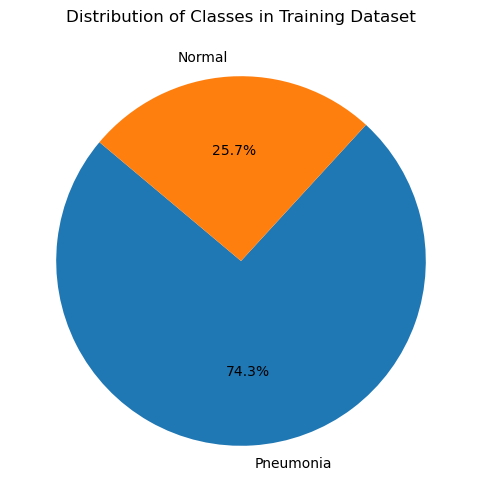

In [43]:
# Counting occurrences of each class
pneumonia_count = np.sum(train_labels == 0)
normal_count = np.sum(train_labels == 1)

# Creating labels and counts for the pie chart
labels = ['Pneumonia', 'Normal']
counts = [pneumonia_count, normal_count]

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes in Training Dataset')
plt.show()

In [44]:
# Counting occurrences of each class in the training dataset
train_pneumonia_count = np.sum(train_labels == 0)
train_normal_count = np.sum(train_labels == 1)

# Counting occurrences of each class in the test dataset
test_pneumonia_count = np.sum(test_labels == 0)
test_normal_count = np.sum(test_labels == 1)

# Counting occurrences of each class in the validation dataset
val_pneumonia_count = np.sum(val_labels == 0)
val_normal_count = np.sum(val_labels == 1)

print("Training Dataset:")
print("Pneumonia:", train_pneumonia_count)
print("Normal:", train_normal_count)
print("")

print("Test Dataset:")
print("Pneumonia:", test_pneumonia_count)
print("Normal:", test_normal_count)
print("")

print("Validation Dataset:")
print("Pneumonia:", val_pneumonia_count)
print("Normal:", val_normal_count)


Training Dataset:
Pneumonia: 3875
Normal: 1341

Test Dataset:
Pneumonia: 390
Normal: 234

Validation Dataset:
Pneumonia: 8
Normal: 8


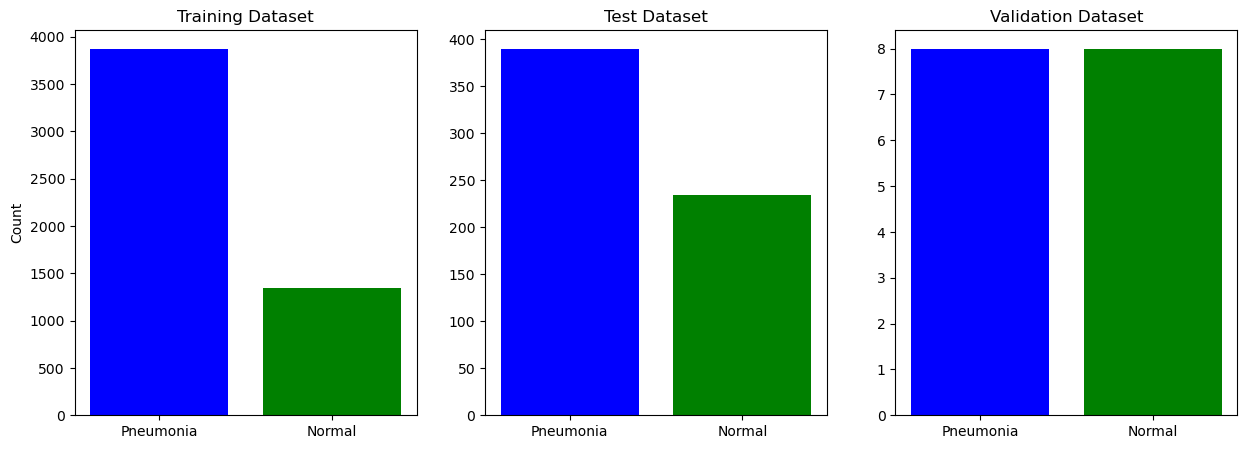

In [71]:
import matplotlib.pyplot as plt

# Define class labels and counts
classes = ['Pneumonia', 'Normal']
train_counts = [train_pneumonia_count, train_normal_count]
test_counts = [test_pneumonia_count, test_normal_count]
val_counts = [val_pneumonia_count, val_normal_count]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(classes, train_counts, color=['blue', 'green'])
axs[0].set_title('Training Dataset')
axs[0].set_ylabel('Count')
axs[1].bar(classes, test_counts, color=['blue', 'green'])
axs[1].set_title('Test Dataset')
axs[2].bar(classes, val_counts, color=['blue', 'green'])
axs[2].set_title('Validation Dataset')

# Display plot
plt.show()


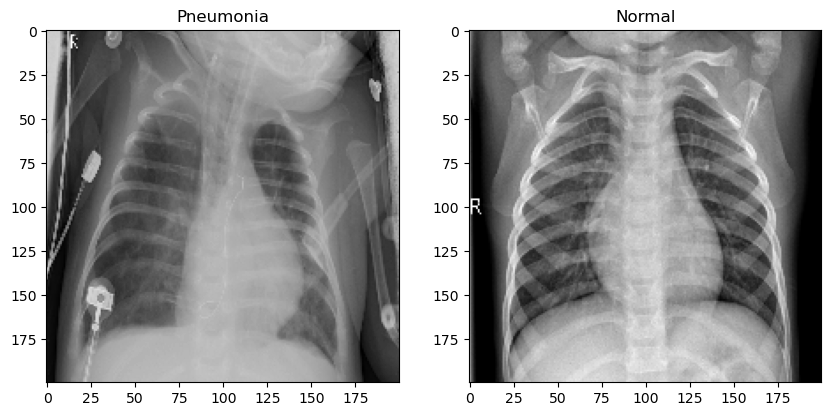

In [45]:
# Previewing the images of both classes
plt.figure(figsize=(10, 5))

# First image
plt.subplot(1, 2, 1)
plt.imshow(train_images[0], cmap='gray')
plt.title(labels[train_labels[0]])

# Last image
plt.subplot(1, 2, 2)
plt.imshow(train_images[-1], cmap='gray')
plt.title(labels[train_labels[-1]])

plt.show()


In [46]:
# Extracting features and labels separately
x_train, y_train = train_images, train_labels
x_test, y_test = test_images, test_labels
x_val, y_val = val_images, val_labels


In [48]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [49]:
#data resizing for deep learning . . . . . . . . . . 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [50]:
# Define new data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,        # Rotate images randomly up to 20 degrees
    width_shift_range=0.1,    # Shift images horizontally by 10% of total width
    height_shift_range=0.1,   # Shift images vertically by 10% of total height
    shear_range=0.2,          # Apply shear transformation
    zoom_range=0.2,           # Zoom images randomly up to 20%
    horizontal_flip=True,     # Flip images horizontally
    fill_mode='nearest'       # Fill in missing pixels with the nearest value
)

# Fit the ImageDataGenerator to the training data
datagen.fit(x_train)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_size, img_size, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 200, 200, 32)      320       
                                                                 
 batch_normalization_18 (Ba  (None, 200, 200, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 100, 100, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 batch_normalization_19 (Ba  (None, 100, 100, 64)      256       
 tchNormalization)                                               
                                                      

In [60]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [66]:
# Create data generators with augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

validation_datagen = ImageDataGenerator()

validation_generator = validation_datagen.flow(x_val, y_val)

# Train the model
history = model.fit(
    train_generator,
    epochs=12,
    validation_data=validation_generator,
    callbacks=[learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 340s 2s/step - loss: 0.6221 - accuracy: 0.8514 - val_loss: 67.3124 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 105s 644ms/step - loss: 0.2761 - accuracy: 0.8886 - val_loss: 47.4310 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2620 - accuracy: 0.9036
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 109s 668ms/step - loss: 0.2620 - accuracy: 0.9036 - val_loss: 9.6669 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 106s 652ms/step - loss: 0.1917 - accuracy: 0.9275 - val_loss: 2.5251 - val_accuracy: 0.6250 - lr: 3.0000e-04
Epoch 5/12
163/163 [==============================] - 114s 701ms/step - loss: 0.1698 - accuracy: 0.9327 - val_loss: 0.4966 - val_accuracy: 0.7500 - lr: 3.0000e-04
Epoch 6/12
163/163 [=================

In [67]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

20/20 [==============================] - 3s 170ms/step - loss: 0.2721 - accuracy: 0.8862
Test Loss: 0.2720679044723511
Test Accuracy: 0.8862179517745972


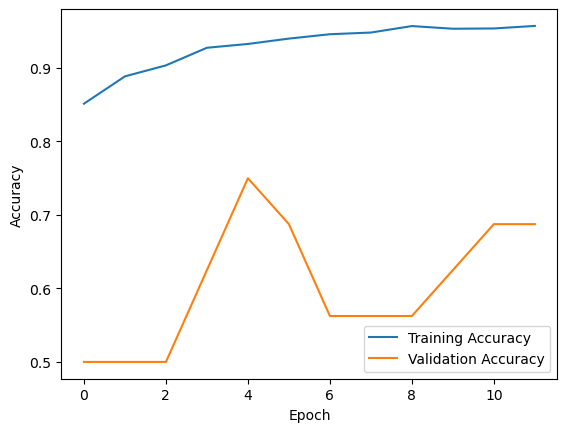

In [68]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [69]:
# Flatten true labels for classification report
y_test_flat = y_test.flatten()

# Predict probabilities for test set
y_pred_probs = model.predict(x_test)

# Convert probabilities to class predictions
y_pred = (y_pred_probs > 0.5).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_flat, y_pred, target_names=labels))

20/20 [==============================] - 3s 153ms/step
Classification Report:
              precision    recall  f1-score   support

   Pneumonia       0.93      0.88      0.91       390
      Normal       0.82      0.90      0.86       234

    accuracy                           0.89       624
   macro avg       0.88      0.89      0.88       624
weighted avg       0.89      0.89      0.89       624



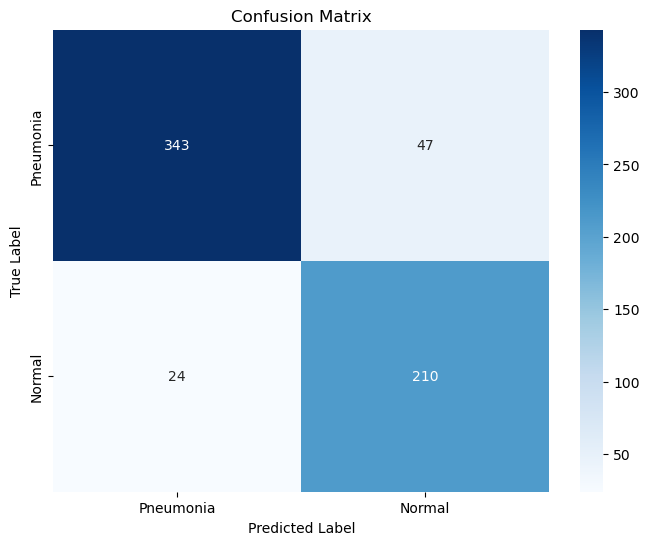

In [70]:
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()